In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
import cmath

from tkinter import *
from tkinter import filedialog
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
def multi_gaussian(pos, mu, si):
  
    n = mu.shape[0]

    Sig_det = np.linalg.det(si)
    Sig_inv = np.linalg.inv(si)

    N = np.sqrt((2 * np.pi)**n * Sig_det)

    fac = np.einsum('...k,kl,...l->...', pos-mu, Sig_inv, pos-mu)
    
    return np.exp(-fac/2)/N

def gauss(x, y):
  
    mu = np.array([x, y])
    sd = np.std([640, 480])

    Sigma = np.array([[sd, 0], [0, sd]])

    X = np.linspace(0, 640, 640)
    Y = np.linspace(0, 480, 480)

    X, Y = np.meshgrid(X, Y)

    pos = np.empty(X.shape + (2,))

    pos[:, :, 0] = X
    pos[:, :, 1] = Y

    Z = multi_gaussian(pos, mu, Sigma)

    Gaussian_Matrix.append(Z)

In [15]:
global Gaussian_Matrix, All_Gaussian_Matrix, Fourier_Matrix

Gaussian_Matrix = []
All_Gaussian_Matrix = []
Fourier_Matrix = []

l = os.listdir('../coordinate/')
stat = os.listdir('../static/')

for i in range(100):

    Gaussian_Matrix = []

    f = open('../coordinate/' + l[i], 'r')

    co = f.read().split('\n')[: -1]

    for j in co:
        x, y = j.split(',')
        gauss(int(x), int(y))

    f.close()

    path = '../static/' + stat[i]
    img = cv2.imread(path, 0)
    
    M1M2arr = np.sum(Gaussian_Matrix, axis = 0)

    M1M2arr = np.log(np.add(M1M2arr, 1))
    # img = cv2.equalizeHist(img)
    img = np.log(np.add(img, 1))

    All_Gaussian_Matrix.append(np.fft.fft2(M1M2arr))
    Fourier_Matrix.append(np.fft.fft2(img))


H = []
for i in range(len(All_Gaussian_Matrix)):
    H.append(np.divide(All_Gaussian_Matrix[i], Fourier_Matrix[i]))

H_avg = np.empty([480, 640])
for i in range(len(H)):
    H_avg = np.add(H_avg, H[i])
H_avg /= len(H)

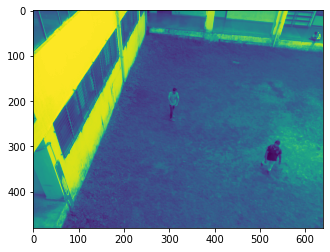

In [16]:
ig = cv2.imread("../static/file300.png", 0)
plt.imshow(ig)

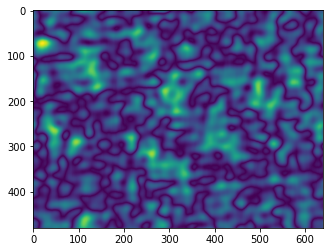

In [17]:
f = np.multiply(np.fft.fft2(ig), H_avg)
inv = np.fft.ifft2(f)
plt.imshow(np.abs(inv))